In [44]:
import numpy as np
import matplotlib.pyplot as plt

In [45]:
# def add_noise(signal, mean, std_dev):
#     noise = np.random.normal(mean, std_dev, size=len(signal))
#     noisy_signal = signal + noise
#     return noisy_signal

In [70]:
np.random.seed(12891832)
a=0.780+0.265*np.random.rand()
omega=1.884+0.116*np.random.rand()

size=1000
def f_(x,a_=a,omega_=omega):
    return a_*np.sin(omega_*x)+2.09-a_
data=np.array([])
X=np.linspace(0,4,size)
X_use_list=X
X_=np.ones((X.size, 1))
Y=f_(X)+np.random.normal(0, 0.8, size)*a
y_use_list=Y
Y=np.matrix(Y)

X_use_list.shape, y_use_list.shape

((1000,), (1000,))

In [47]:
theta = np.matrix(np.array([0.78,1.884]))

In [93]:
def computeCost(X, y, theta,mode="MSE"):

    a_ = theta[0,0]
    omega_ = theta[0,1]
    if(mode=="MSE"):
        inner = np.power(((a_*np.sin(omega_*X)+2.09-a_) - y), 2)
        return np.sum(inner) / (2 * len(X))
    elif(mode=="MAE"):
        inner = np.abs((a_*np.sin(omega_*X)+2.09-a_) - y)
        return np.sum(inner) / (2 * len(X))
    elif(mode=="Smoth"):
                # 如果x小於1，則返回0.5*x^2，否則返回|x|-0.5
        inner = np.zeros(len(X))
        for i in range(len(X)):
            if np.abs((a_*np.sin(omega_*X[i])+2.09-a_) - y[i])<1:
                inner[i]=0.5*np.power((a_*np.sin(omega_*X[i])+2.09-a_) - y[i],2)
            else:
                inner[i]=np.abs((a_*np.sin(omega_*X[i])+2.09-a_) - y[i])-0.5
        return np.sum(inner) / (2 * len(X))
    # return 0

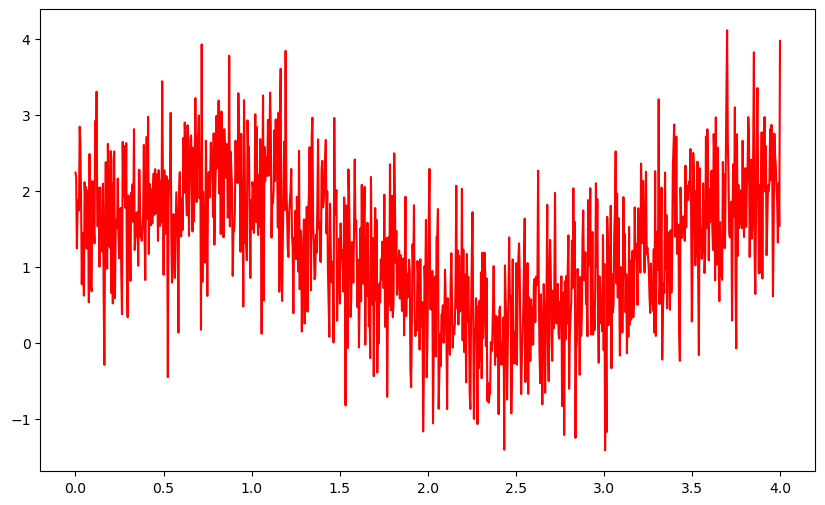

In [73]:
# 绘制X Y
plt.figure(figsize=(10,6))
plt.plot(X_use_list,y_use_list,'r',label='Y')

plt.show()

In [100]:
x=np.matrix(np.array([0,0.99]))
computeCost(X,Y,theta,mode="MAE")
# print(x.shape,x.T.shape)

0.29141567198726853

In [79]:
def gradientDescent_(X, y, theta, alpha, iters,mode_="MSE"):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    # mode_="SmoothL1Loss"
    d_len=0.01
    for i in range(iters):
        theta_=np.matrix(np.ones(theta.shape)*d_len)
        for j in range(parameters):
            # 对于第i个变量 忽略其他
            theta_use=np.matrix(np.zeros(theta.shape))
            theta_use[0,j]=theta_[0,j]
            term = (computeCost(X, y, theta+theta_use,mode=mode_)-computeCost(X, y, theta-theta_use,mode_))/(2*d_len)
            print("term=%f",theta_use)
            temp[0,j] = theta[0,j] - alpha*term
        theta = temp
        cost[i] = computeCost(X, y, theta,mode=mode_)
        print("cost[%d]=%f theta=%f %f"%(i,cost[i],theta[0,0],theta[0,1]))
    return theta, cost

In [62]:
alpha = 0.01
iters = 1000

In [53]:
X.shape,Y.shape,theta.shape

((1000,), (1, 1000), (1, 2))

In [92]:
g, cost = gradientDescent_(X, Y, theta, alpha, iters,mode_='Smoth')
g

term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[0]=0.291316 theta=0.780935 1.884343
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[1]=0.291216 theta=0.781868 1.884688
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[2]=0.291117 theta=0.782800 1.885032
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[3]=0.291018 theta=0.783729 1.885372
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[4]=0.290920 theta=0.784655 1.885709
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[5]=0.290823 theta=0.785577 1.886041
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[6]=0.290727 theta=0.786495 1.886368
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[7]=0.290634 theta=0.787408 1.886692
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[8]=0.290542 theta=0.788318 1.887010
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[9]=0.290451 theta=0.789223 1.887323
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[10]=0.290361 theta=0.790122 1.887631
term=%f [[0.01 0.  ]]
term=%f [[0.   0.01]]
cost[11]=0.290274 th

matrix([[0.9411348 , 1.93927742]])

In [85]:
a,omega

(0.9121324056464785, 1.9472446594174573)

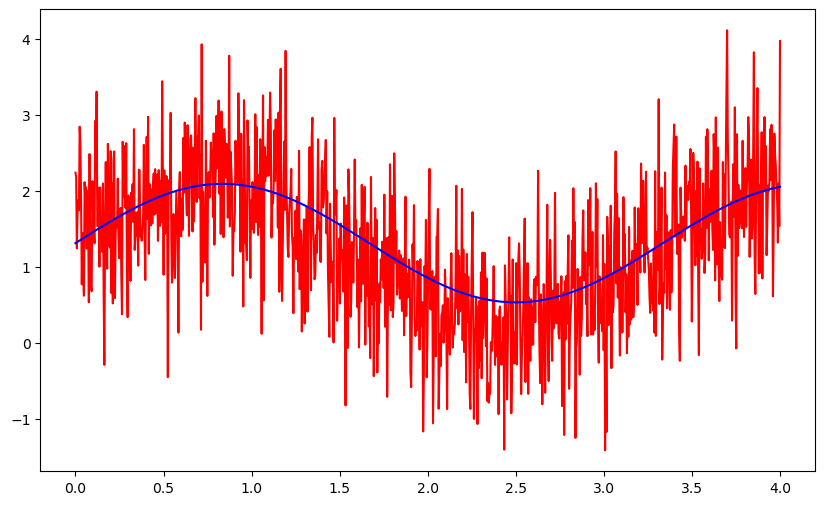

In [86]:
# 绘制X Y
plt.figure(figsize=(10,6))
plt.plot(X_use_list,y_use_list,'r',label='Y')
plt.plot(X_use_list,f_(X,a_=theta[0,0],omega_=theta[0,1]),'b',label='Y')


plt.show()
# 输出和真实值的差距